# Task 1

### 1A. Load packages, set the random_state value, and define any global functions

In [ ]:
# Import the necessary packages

# Mathematics and Statistics Packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive
from google.colab import data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split

# Linear Regression Packages
from sklearn.linear_model import LinearRegression

# Decision Tree Packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Model Evaluation Packages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Cross-Validation Packages
from sklearn.model_selection import cross_validate


In [ ]:
random_state = 0

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

### 1B. Data Importation

In [ ]:
%%capture
drive.mount('/content/gdrive')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/NA_sales_filtered.csv', encoding = "ISO-8859-1")

### 1C. Show the overall structure and summary of the input data using following functions: info(), describe(), head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [ ]:
df.describe(include = 'all')

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
count,6345,6345,6345,6345,6345.000000,6345.000000,6345.000000,6345.000000,6345.000000
unique,4088,16,12,5,NaN,NaN,NaN,NaN,NaN
top,Madden NFL 07,PS2,Action,T,NaN,NaN,NaN,NaN,NaN
freq,8,1135,1549,2182,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,69.819385,28.966745,70.765485,152.730969,0.354230
std,NaN,NaN,NaN,NaN,13.945811,19.098594,14.438432,545.962483,0.494404
min,NaN,NaN,NaN,NaN,13.000000,3.000000,5.000000,4.000000,0.010000
25%,NaN,NaN,NaN,NaN,61.000000,14.000000,64.000000,10.000000,0.080000
50%,NaN,NaN,NaN,NaN,72.000000,25.000000,74.000000,24.000000,0.170000
75%,NaN,NaN,NaN,NaN,80.000000,40.000000,81.000000,77.000000,0.410000


In [ ]:
df.head(20)

,Name,Platform,Genre,Rating,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales
0,Final Fantasy VII,PS,Role-Playing,T,92,20,91,1282,3.01
1,Final Fantasy X,PS2,Role-Playing,T,92,53,86,1056,2.91
2,The Sims 3,PC,Simulation,T,86,75,75,886,0.99
3,Final Fantasy VIII,PS,Role-Playing,T,90,24,85,644,2.28
4,Tekken 3,PS,Fighting,T,96,15,90,367,3.27
5,Medal of Honor: Frontline,PS2,Shooter,T,88,29,84,135,2.93
6,Uncharted 3: Drake's Deception,PS3,Action,T,92,97,82,3712,2.77
7,Uncharted 2: Among Thieves,PS3,Action,T,96,105,87,5187,3.27
8,World of Warcraft,PC,Role-Playing,T,93,57,72,2182,0.08
9,Driver,PS,Action,T,87,22,80,78,3.11


### 1D. Remove the one column that should be eliminated from the dataset before modeling

In [ ]:
sales_df = df.drop(columns = 'Name')

### 1E. Convert all integer datatype variables to floating point variables

In [ ]:
# Make a list of the variables whose datatypes are integer from the dataframe; print the results.
integer_columns_list = list(sales_df.select_dtypes(include='int64').columns)
print(integer_columns_list)

['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']


In [ ]:
# Convert the object and integer variables to categorical variables
sales_df[integer_columns_list] = sales_df[integer_columns_list].astype('float64')

In [ ]:
# Make a list of the variables whose datatypes are float from the dataframe; print the results.
float_columns_list = list(sales_df.select_dtypes(include='float64').columns)
print(float_columns_list)

['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'NA_Sales']


# Task 2

### 2A. Create a seaborn pairplot of the data with the dependent variable as the hue

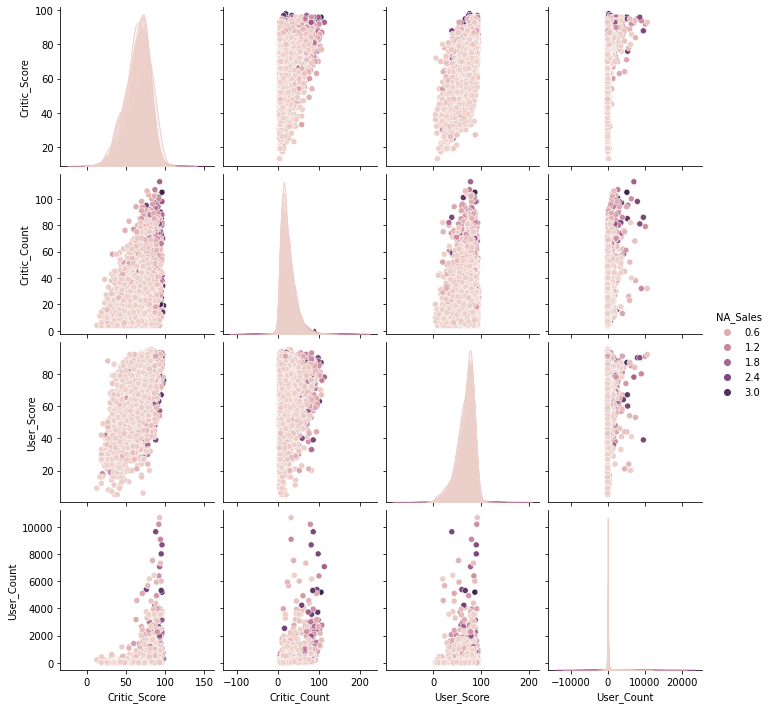

In [ ]:
sns.pairplot(data = sales_df , hue = 'NA_Sales')

### 2B. One-hot encode your categorical variables using the methods from previous course modules

In [ ]:
object_columns_list = list(sales_df.select_dtypes(include='object').columns)
print(object_columns_list)

['Platform', 'Genre', 'Rating']


In [ ]:
# Convert the object and integer variables to categorical variables
sales_df[object_columns_list] = sales_df[object_columns_list].astype('category')

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Platform      6345 non-null   category
 1   Genre         6345 non-null   category
 2   Rating        6345 non-null   category
 3   Critic_Score  6345 non-null   float64 
 4   Critic_Count  6345 non-null   float64 
 5   User_Score    6345 non-null   float64 
 6   User_Count    6345 non-null   float64 
 7   NA_Sales      6345 non-null   float64 
dtypes: category(3), float64(5)
memory usage: 267.8 KB


In [ ]:
# Make one-hot columns to replace the category columns in the dataframe
sales_onehot_df = pd.get_dummies(sales_df,columns=object_columns_list)

In [ ]:
# Look at the shape of the one-hot encoded dataframe
sales_onehot_df.shape

(6345, 38)

In [ ]:
# Perform a sanity check on the number of variables in the new dataframe
print("Number of Platform Variables: "+str(len(sales_df['Platform'].unique())))
print("Number of Genre Variables: "+str(len(sales_df['Genre'].unique())))
print("Number of Rating Variables: "+str(len(sales_df['Rating'].unique())))

#print("Number of Integer Variables: "+str(len(integer_columns_list)))
print("Number of Float Variables: "+str(len(float_columns_list)))

Number of Platform Variables: 16
Number of Genre Variables: 12
Number of Rating Variables: 5
Number of Float Variables: 5


### 2C. Create a dataframe that represents the correlations between all pairs of data variable

In [ ]:
# Assign the Pearson Pairwise Correlations to a Dataframe as a Variable Name
correlations = sales_onehot_df.corr()
correlations

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
Critic_Score,1.000000,0.390399,0.584548,0.243688,0.352974,-0.021739,-0.067650,0.006780,0.020747,0.128267,...,0.067343,0.005083,0.002281,0.125688,0.037306,0.028745,-0.056967,0.052716,-0.032024,0.005483
Critic_Count,0.390399,1.000000,0.192762,0.348060,0.343505,0.024169,-0.081682,-0.134215,-0.094342,0.037563,...,0.075680,0.148922,-0.052613,-0.115722,0.008045,-0.217801,-0.083019,0.271661,0.045860,-0.031204
User_Score,0.584548,0.192762,1.000000,0.012398,0.145351,-0.030359,-0.027861,0.070886,0.070571,-0.042357,...,0.100990,-0.029460,0.013546,-0.007128,0.021438,0.004001,-0.079940,-0.006644,0.058160,0.013150
User_Count,0.243688,0.348060,0.012398,1.000000,0.268393,-0.015874,-0.063413,-0.046966,-0.052788,0.380796,...,0.101914,0.107108,-0.030941,-0.083104,0.025155,-0.126762,-0.054722,0.262824,-0.059529,-0.002175
NA_Sales,0.352974,0.343505,0.145351,0.268393,1.000000,-0.031655,-0.021830,-0.007243,-0.034052,-0.069656,...,-0.020579,0.032251,0.006310,0.042431,-0.063630,0.049413,-0.037965,0.051819,-0.060773,-0.029480
Platform_3DS,-0.021739,0.024169,-0.030359,-0.015874,-0.031655,1.000000,-0.042000,-0.029761,-0.036591,-0.033819,...,0.034406,-0.047507,0.013287,-0.049981,-0.008024,0.012174,0.085228,-0.049814,-0.030362,-0.009093
Platform_DS,-0.067650,-0.081682,-0.027861,-0.063413,-0.021830,-0.042000,1.000000,-0.054998,-0.067620,-0.062497,...,0.082193,-0.056030,0.052923,-0.078458,0.050049,0.105769,0.137482,-0.127466,-0.093892,-0.006660
Platform_GBA,0.006780,-0.134215,0.070886,-0.046966,-0.007243,-0.029761,-0.054998,1.000000,-0.047915,-0.044285,...,0.013416,-0.042357,-0.006021,-0.036608,-0.005986,0.174264,-0.038204,-0.087621,-0.066088,-0.011907
Platform_GC,0.020747,-0.094342,0.070571,-0.052788,-0.034052,-0.036591,-0.067620,-0.047915,1.000000,-0.054448,...,-0.029102,-0.009116,-0.013984,0.036620,-0.014964,0.089949,-0.063336,-0.064907,0.015352,-0.014640
Platform_PC,0.128267,0.037563,-0.042357,0.380796,-0.069656,-0.033819,-0.062497,-0.044285,-0.054448,1.000000,...,0.034705,0.081820,0.086974,-0.077775,0.153627,-0.113729,-0.027835,0.144556,0.006923,0.011027


### 2D. Use the correlation dataframe to create a seaborn heatmap of the correlations, including annotations

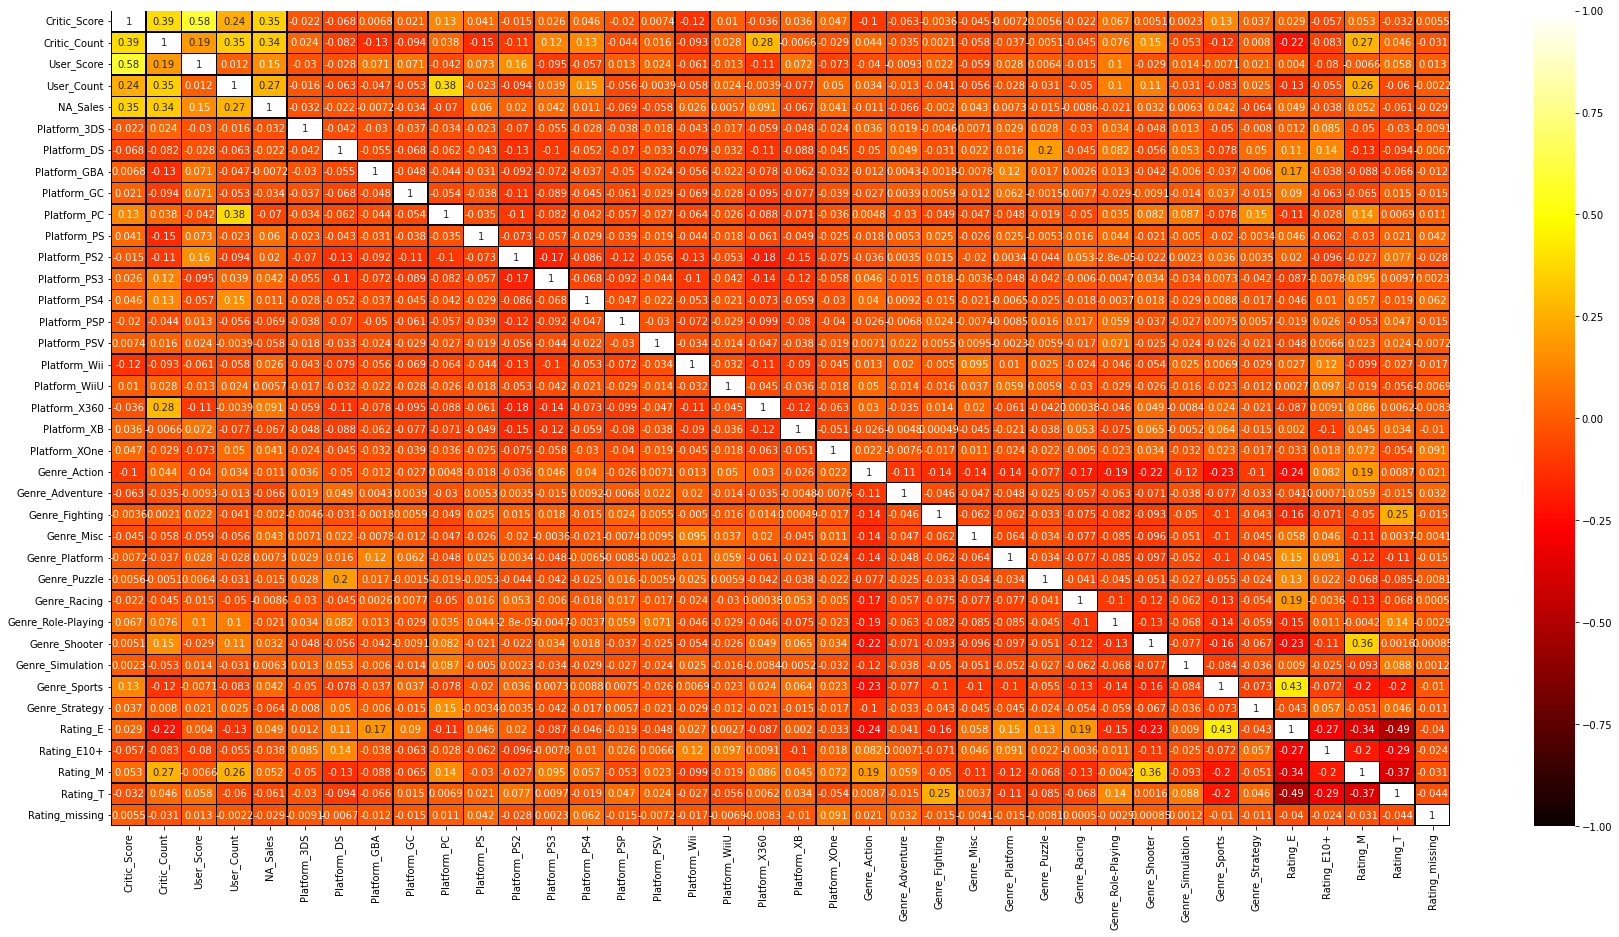

In [ ]:
# Utilize Seaborn to Make a Heat Map of the Variable Correlations
fig = plt.figure(figsize=(30,15))
ax = sns.heatmap(data = correlations, annot = True, linewidths = .5, linecolor = 'black', vmin = -1.0, vmax = 1.0, cmap = 'hot')
plt.show()

# Task 3

### 3A. Perform a silmultaneous partition of the data into both training and testing sets and also an independent/dependent data separation

In [ ]:
# Perform the train/test split with a 70/30 ratio of train instances to test instances.
train_df, test_df = train_test_split(sales_onehot_df,test_size=0.3,random_state=random_state)

In [ ]:
# Obtain a list of all of the variables
variable_list = list(set(list(train_df.columns)+list(test_df.columns)))
print("All Variables: "+str(variable_list))

All Variables: ['Genre_Strategy', 'Platform_DS', 'Rating_M', 'Platform_WiiU', 'Genre_Action', 'Platform_PS', 'Rating_T', 'Platform_GC', 'Genre_Adventure', 'Genre_Shooter', 'Genre_Puzzle', 'Genre_Misc', 'Platform_PS3', 'Platform_3DS', 'Platform_X360', 'Genre_Role-Playing', 'Genre_Platform', 'User_Count', 'Platform_PS4', 'Genre_Simulation', 'Platform_XB', 'Platform_PS2', 'User_Score', 'Genre_Fighting', 'Genre_Racing', 'Rating_E10+', 'Platform_XOne', 'Critic_Score', 'Rating_missing', 'Critic_Count', 'Platform_Wii', 'Platform_PSV', 'Platform_PSP', 'Genre_Sports', 'Platform_PC', 'Rating_E', 'Platform_GBA', 'NA_Sales']


In [ ]:
# Separate lists of independent variables and dependent variables
quality_index = variable_list.index('NA_Sales')
dependent_variable_list = [variable_list.pop(quality_index)]
print("Dependent Variable: "+str(dependent_variable_list))
independent_variable_list = sorted(variable_list)
print("Independent Variables: "+str(independent_variable_list))
print(len(independent_variable_list))

Dependent Variable: ['NA_Sales']
Independent Variables: ['Critic_Count', 'Critic_Score', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Platform_3DS', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_T', 'Rating_missing', 'User_Count', 'User_Score']
37


In [ ]:
# Perform the independent/dependent data separations
# Perform sanity check of data dimensions with comparisons to training, testing, and original dataframes
X_train = train_df[independent_variable_list].to_numpy()
print("Training Independent Data Shape: "+str(X_train.shape))
y_train_ground_truth = train_df[dependent_variable_list].to_numpy().reshape(-1)
print("Training Dependent Data Shape: "+str(y_train_ground_truth.shape))
print("Training Data Set Shape: "+str(train_df.shape))
print("\n")
X_test = test_df[independent_variable_list].to_numpy()
print("Testing Independent Data Shape: "+str(X_test.shape))
y_test_ground_truth = test_df[dependent_variable_list].to_numpy().reshape(-1)
print("Testing Dependent Data Shape: "+str(y_test_ground_truth.shape))
print("Testing Data Set Shape: "+str(test_df.shape))
print("\n")
X = sales_onehot_df[independent_variable_list].to_numpy()
print("Original Independent Data Shape: "+str(X.shape))
y_ground_truth = sales_onehot_df[dependent_variable_list].to_numpy().reshape(-1)
print("Original Dependent Data Shape: "+str(y_ground_truth.shape))
print("Original Data Set Shape: "+str(sales_onehot_df.shape))

Training Independent Data Shape: (4441, 37)
Training Dependent Data Shape: (4441,)
Training Data Set Shape: (4441, 38)


Testing Independent Data Shape: (1904, 37)
Testing Dependent Data Shape: (1904,)
Testing Data Set Shape: (1904, 38)


Original Independent Data Shape: (6345, 37)
Original Dependent Data Shape: (6345,)
Original Data Set Shape: (6345, 38)


In [ ]:
print("Order of Independent Variables in NumPy Array: "+str(independent_variable_list))

Order of Independent Variables in NumPy Array: ['Critic_Count', 'Critic_Score', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy', 'Platform_3DS', 'Platform_DS', 'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_T', 'Rating_missing', 'User_Count', 'User_Score']


### 3B. Show overall summaries of training and testing sets with the info() and describe(include='all') functions

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 5244 to 2732
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        4441 non-null   float64
 1   Critic_Count        4441 non-null   float64
 2   User_Score          4441 non-null   float64
 3   User_Count          4441 non-null   float64
 4   NA_Sales            4441 non-null   float64
 5   Platform_3DS        4441 non-null   uint8  
 6   Platform_DS         4441 non-null   uint8  
 7   Platform_GBA        4441 non-null   uint8  
 8   Platform_GC         4441 non-null   uint8  
 9   Platform_PC         4441 non-null   uint8  
 10  Platform_PS         4441 non-null   uint8  
 11  Platform_PS2        4441 non-null   uint8  
 12  Platform_PS3        4441 non-null   uint8  
 13  Platform_PS4        4441 non-null   uint8  
 14  Platform_PSP        4441 non-null   uint8  
 15  Platform_PSV        4441 non-null   uint8  
 16  Pla

In [ ]:
train_df.describe(include = 'all')

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
count,4441.00000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,...,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000,4441.000000
mean,69.87120,28.928169,70.722585,158.101103,0.350036,0.020716,0.072731,0.035803,0.054492,0.050214,...,0.103355,0.122945,0.038505,0.147714,0.029723,0.311191,0.142085,0.199054,0.344292,0.003378
std,13.84706,19.130915,14.357362,583.969272,0.487211,0.142448,0.259724,0.185819,0.227012,0.218411,...,0.304456,0.328411,0.192433,0.354857,0.169841,0.463033,0.349177,0.399334,0.475190,0.058026
min,17.00000,3.000000,5.000000,4.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.00000,14.000000,64.000000,10.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.00000,24.000000,74.000000,24.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.00000,40.000000,81.000000,75.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,107.000000,95.000000,10665.000000,3.490000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904 entries, 5323 to 439
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        1904 non-null   float64
 1   Critic_Count        1904 non-null   float64
 2   User_Score          1904 non-null   float64
 3   User_Count          1904 non-null   float64
 4   NA_Sales            1904 non-null   float64
 5   Platform_3DS        1904 non-null   uint8  
 6   Platform_DS         1904 non-null   uint8  
 7   Platform_GBA        1904 non-null   uint8  
 8   Platform_GC         1904 non-null   uint8  
 9   Platform_PC         1904 non-null   uint8  
 10  Platform_PS         1904 non-null   uint8  
 11  Platform_PS2        1904 non-null   uint8  
 12  Platform_PS3        1904 non-null   uint8  
 13  Platform_PS4        1904 non-null   uint8  
 14  Platform_PSP        1904 non-null   uint8  
 15  Platform_PSV        1904 non-null   uint8  
 16  Plat

In [ ]:
test_df.describe(include = 'all')

,Critic_Score,Critic_Count,User_Score,User_Count,NA_Sales,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T,Rating_missing
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,...,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,69.698529,29.056723,70.865546,140.205357,0.364013,0.025735,0.070378,0.041492,0.058298,0.042542,...,0.096639,0.132353,0.042017,0.139181,0.032038,0.307773,0.129202,0.215861,0.342962,0.004202
std,14.176408,19.027704,14.629091,444.758063,0.510783,0.158386,0.255850,0.199477,0.234368,0.201875,...,0.295543,0.338963,0.200680,0.346226,0.176147,0.461693,0.335511,0.411527,0.474824,0.064701
min,13.000000,4.000000,6.000000,4.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,14.000000,63.000000,10.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,25.000000,74.000000,25.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,39.000000,81.000000,79.250000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,96.000000,113.000000,95.000000,7064.000000,3.480000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3C. Show normalized histograms of the dependent variable for the (1) entire dataset, (2) training dataset, and (3) testing dataset, in order to verify a random splitting of the data

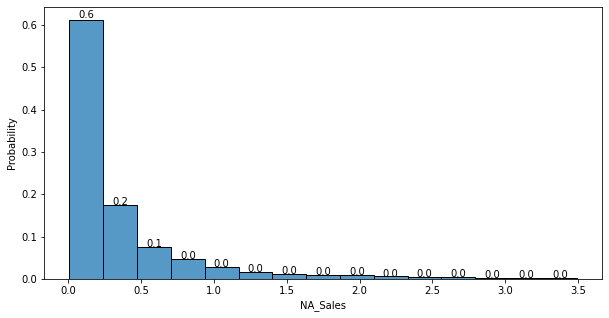

In [ ]:
# Overall data set
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=sales_onehot_df['NA_Sales'],bins=15,stat='probability')
show_values(ax)

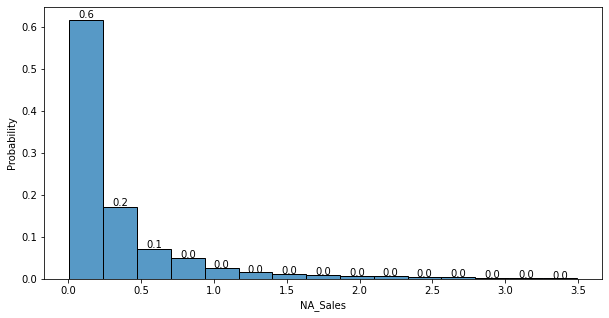

In [ ]:
# Training data set
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=train_df['NA_Sales'],bins=15,stat='probability')
show_values(ax)

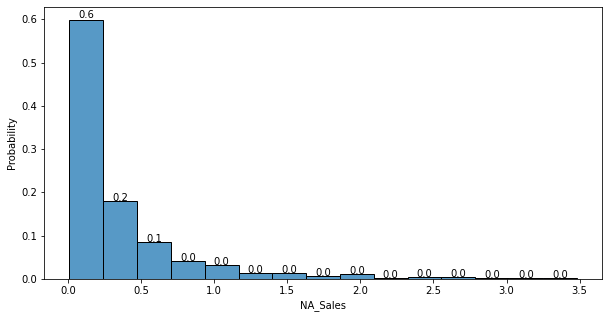

In [ ]:
# Testing data set
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(data=test_df['NA_Sales'],bins=15,stat='probability')
show_values(ax)

# Task 4. For this task and throughout the rest of this assignment, use the default settings for LR and set ccp_alpha=0.001 and max_depth=5 for DTR

### 4A. Fit the following two models on the training set. (1) LinearRegression(), (2) DecisionTreeRegressor() 

In [ ]:
# Fit a Linear Regression Model on the Training Set
lin_reg_full = LinearRegression().fit(X_train,y_train_ground_truth)

In [ ]:
# Assign the Decision Tree
reg_tree_1 = DecisionTreeRegressor(random_state=0, max_depth = 5)

In [ ]:
# Fit the Decision Tree to the Training Data
reg_tree_1 = reg_tree_1.fit(X_train,y_train_ground_truth)

### 4B. For the two trained models, display their characteristics

### LR model: slope coefficients in tabular form and print the intercept coefficient

In [ ]:
# Slope Coefficient 
pd.DataFrame({'Feature':independent_variable_list,'Slope Coefficient':lin_reg_full.coef_})

,Feature,Slope Coefficient
0,Critic_Count,0.006128
1,Critic_Score,0.010695
2,Genre_Action,0.045205
3,Genre_Adventure,-0.111212
4,Genre_Fighting,0.054928
5,Genre_Misc,0.109587
6,Genre_Platform,0.017974
7,Genre_Puzzle,-0.107243
8,Genre_Racing,-0.009822
9,Genre_Role-Playing,-0.061881


In [ ]:
# Intercept
print("Intercept: "+str(lin_reg_full.intercept_.round(5)))

Intercept: -0.47562


### DTR model: print the model's decision rule summary and plot the decision tree

In [ ]:
# Print a Summary of the Model's Fitting Results
reg_tree_1_model = export_text(reg_tree_1)
print(reg_tree_1_model)

|--- feature_35 <= 66.50
|   |--- feature_35 <= 21.50
|   |   |--- feature_1 <= 75.50
|   |   |   |--- feature_30 <= 0.50
|   |   |   |   |--- feature_35 <= 12.50
|   |   |   |   |   |--- value: [0.11]
|   |   |   |   |--- feature_35 >  12.50
|   |   |   |   |   |--- value: [0.17]
|   |   |   |--- feature_30 >  0.50
|   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |--- value: [0.19]
|   |   |   |   |--- feature_25 >  0.50
|   |   |   |   |   |--- value: [0.35]
|   |   |--- feature_1 >  75.50
|   |   |   |--- feature_35 <= 15.50
|   |   |   |   |--- feature_30 <= 0.50
|   |   |   |   |   |--- value: [0.16]
|   |   |   |   |--- feature_30 >  0.50
|   |   |   |   |   |--- value: [0.27]
|   |   |   |--- feature_35 >  15.50
|   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |--- value: [0.34]
|   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |--- value: [1.67]
|   |--- feature_35 >  21.50
|   |   |--- feature_1 <= 81.50
|   |   |   |--- feature_30 <= 0.50
|   |

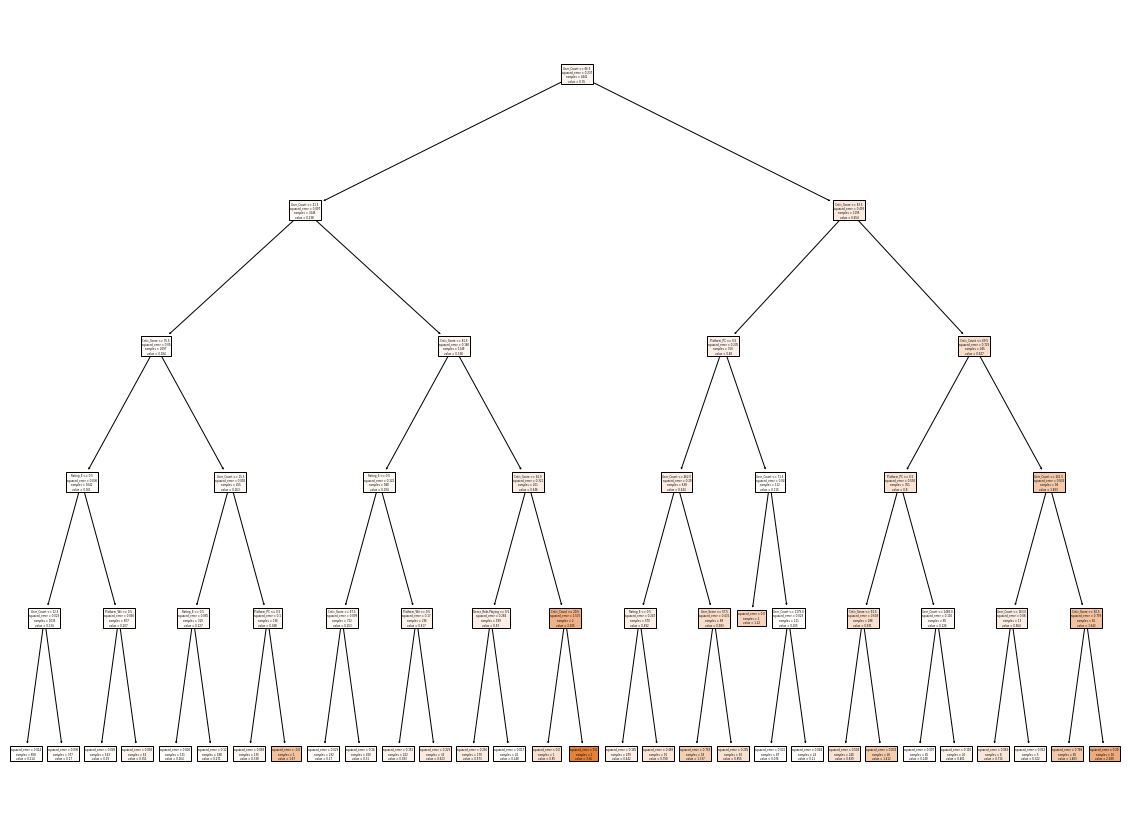

In [ ]:
# Plot
fig = plt.figure(figsize=(20,15))
ax = plot_tree(reg_tree_1,feature_names=independent_variable_list,filled=True)

### 4C. Make predictions on both the training set and testing set for each of the two models: LR and DTR

### LR

In [ ]:
predictions_1_train_LR = lin_reg_full.predict(X_train)
predictions_1_test_LR = lin_reg_full.predict(X_test)
print("Training Predictions Shape: "+str(predictions_1_train_LR.shape))
print("Testing Predictions Shape: "+str(predictions_1_test_LR.shape))

Training Predictions Shape: (4441,)
Testing Predictions Shape: (1904,)


### DTR

In [ ]:
predictions_1_train_DTR = reg_tree_1.predict(X_train)
predictions_1_test_DTR = reg_tree_1.predict(X_test)
print("Training Predictions Shape: "+str(predictions_1_train_DTR.shape))
print("Testing Predictions Shape: "+str(predictions_1_test_DTR.shape))

Training Predictions Shape: (4441,)
Testing Predictions Shape: (1904,)


### 4D. Print the model's p-value for both the training dataset and the testing dataset

In [ ]:
# Calculate the p-Value
X2 = sm.add_constant(X_test)
estimator = sm.OLS(y_test_ground_truth,X2)
print("p-Value from StatsModels: "+str('{:0.3e}'.format(estimator.fit().f_pvalue)))

p-Value from StatsModels: 6.819e-109


### 4E. For both the LR and DTR models, on both the training dataset and testing dataset, print the MAE, MSE, and R-Squared (Coefficient of Determination) values in an organized manner so that they can be easily compared between the two models and two datasets

### LR

In [ ]:
print("Training Dataset")
print("Mean Absolute Error (MAE): ",mean_absolute_error(y_train_ground_truth,predictions_1_train_LR))
print("Mean Squared Error (MSE): ",mean_squared_error(y_train_ground_truth,predictions_1_train_LR))
print("Coefficient of Determination (R-Squared):",r2_score(y_train_ground_truth,predictions_1_train_LR))
print("\n")
print("Testing Dataset")
print("Mean Absolute Error (MAE): ",mean_absolute_error(y_test_ground_truth,predictions_1_test_LR))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test_ground_truth,predictions_1_test_LR))
print("Coefficient of Determination (R-Squared):",r2_score(y_test_ground_truth,predictions_1_test_LR))

Training Dataset
Mean Absolute Error (MAE):  0.26782056105180185
Mean Squared Error (MSE):  0.16985779683018948
Coefficient of Determination (R-Squared): 0.28427163020557


Testing Dataset
Mean Absolute Error (MAE):  0.271724068081359
Mean Squared Error (MSE):  0.192365269194077
Coefficient of Determination (R-Squared): 0.26229754650721504


### DTR

In [ ]:
print("Training Dataset")
print("Mean Absolute Error (MAE): ",mean_absolute_error(y_train_ground_truth,predictions_1_train_DTR))
print("Mean Squared Error (MSE): ",mean_squared_error(y_train_ground_truth,predictions_1_train_DTR))
print("Coefficient of Determination (R-Squared):",r2_score(y_train_ground_truth,predictions_1_train_DTR))
print("\n")
print("Testing Dataset")
print("Mean Absolute Error (MAE): ",mean_absolute_error(y_test_ground_truth,predictions_1_test_DTR))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test_ground_truth,predictions_1_test_DTR))
print("Coefficient of Determination (R-Squared):",r2_score(y_test_ground_truth,predictions_1_test_DTR))

Training Dataset
Mean Absolute Error (MAE):  0.23426100160866017
Mean Squared Error (MSE):  0.143870606682478
Coefficient of Determination (R-Squared): 0.39377363474736915


Testing Dataset
Mean Absolute Error (MAE):  0.264870321967998
Mean Squared Error (MSE):  0.19217846466557556
Coefficient of Determination (R-Squared): 0.26301392405071045


### 4F. Perform subtask IV-E, but for the metrics of RMSE and MAPE

In [ ]:
import math
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
print("Training Dataset")
print("RMSE, DTR: ",mean_squared_error(y_train_ground_truth,predictions_1_train_DTR))
print("RMSE, LR: ",mean_squared_error(y_train_ground_truth,predictions_1_train_LR))
print("MAPE, DTR:", mean_absolute_percentage_error(y_train_ground_truth,predictions_1_train_DTR))
print("MAPE, LR:", mean_absolute_percentage_error(y_train_ground_truth,predictions_1_train_LR))
print("/n")
print("Testing Dataset")
print("RMSE, DTR: ",mean_squared_error(y_test_ground_truth,predictions_1_test_DTR))
print("RMSE, LR: ",mean_squared_error(y_test_ground_truth,predictions_1_test_LR))
print("MAPE, DTR:", mean_absolute_percentage_error(y_test_ground_truth,predictions_1_test_DTR))
print("MAPE, LR:", mean_absolute_percentage_error(y_test_ground_truth,predictions_1_test_LR))

Training Dataset
RMSE, DTR:  0.143870606682478
RMSE, LR:  0.16985779683018948
MAPE, DTR: 2.1120584565323486
MAPE, LR: 2.5260749722711404
/n
Testing Dataset
RMSE, DTR:  0.19217846466557556
RMSE, LR:  0.192365269194077
MAPE, DTR: 2.2897104119988168
MAPE, LR: 2.5144259117118866


# Task 5

### 5A. Using the cross_validate() function, perform 5-fold Cross-Validation (CV) for the LR model. Create a pandas dataframe of the results

In [ ]:
linear_regression_5fcv_results = cross_validate(LinearRegression(),X,y_ground_truth,cv=5,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
linear_regression_5fcv_results = pd.DataFrame(linear_regression_5fcv_results)
linear_regression_5fcv_results = linear_regression_5fcv_results.drop(['fit_time','score_time'],axis=1)
linear_regression_5fcv_results

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.051449,0.296099,-0.275601,-0.159901,-0.308178,-0.252577
1,0.086847,0.299540,-0.357961,-0.145167,-0.403624,-0.241739
2,-3.839601,0.335344,-0.184019,-0.194897,-0.370183,-0.290715
3,0.173290,0.270284,-0.275294,-0.161501,-0.327426,-0.254103
4,0.128843,0.279372,-0.106520,-0.194673,-0.219023,-0.288516


### 5B. Report the metrics of (1) R-Squared, (2) MAE, (3) MAPE, (4) MSE, and (5) RMSE, for both the training dataset and the testing dataset

In [ ]:
# Summarize each of the cross-validation evaluation results, for both training and testing sets, with an average.
print("Training Dataset")
print("Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_5fcv_results['train_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(linear_regression_5fcv_results['train_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(linear_regression_5fcv_results['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_5fcv_results['test_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(linear_regression_5fcv_results['test_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(linear_regression_5fcv_results['test_r2'].mean(),5)))

Training Dataset
Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26553
Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17123
Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.29613


Testing Dataset
Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.32569
Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.23988
Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -0.67983


### 5C. Perform subtasks V-A and V-B for a DTR model

In [ ]:
regression_tree_cross_5 = DecisionTreeRegressor(random_state=0,min_impurity_decrease=0.005)

In [ ]:
regression_tree_5fcv_results = cross_validate(regression_tree_cross_5,X,y_ground_truth,cv=5,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
regression_tree_5fcv_results = pd.DataFrame(regression_tree_5fcv_results)
regression_tree_5fcv_results = regression_tree_5fcv_results.drop(['fit_time','score_time'],axis=1)
regression_tree_5fcv_results

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.099811,0.315787,-0.319550,-0.155428,-0.357940,-0.237405
1,0.153613,0.230358,-0.331789,-0.159504,-0.371458,-0.250920
2,-2.297608,0.304557,-0.125387,-0.203925,-0.243767,-0.280577
3,0.303907,0.231287,-0.231799,-0.170131,-0.314977,-0.259892
4,-0.030053,0.307066,-0.125949,-0.187191,-0.244786,-0.278874


In [ ]:
# Summarize each of the cross-validation evaluation results, for both training and testing sets, with an average.
print("Training Dataset")
print("Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(regression_tree_5fcv_results['train_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(regression_tree_5fcv_results['train_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(regression_tree_5fcv_results['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(regression_tree_5fcv_results['test_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(regression_tree_5fcv_results['test_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(regression_tree_5fcv_results['test_r2'].mean(),5)))

Training Dataset
Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26153
Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17524
Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.27781


Testing Dataset
Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.30659
Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.22689
Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -0.39399


### 5D. Perform subtasks V-A through V-C for 10-fold CV

### Linear

In [ ]:
linear_regression_10fcv_results = cross_validate(LinearRegression(),X,y_ground_truth,cv=10,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
linear_regression_10fcv_results = pd.DataFrame(linear_regression_10fcv_results)
linear_regression_10fcv_results = linear_regression_10fcv_results.drop(['fit_time','score_time'],axis=1)
linear_regression_10fcv_results

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.306453,0.288985,-0.532251,-0.145274,-0.480448,-0.237052
1,-6.625332,0.292142,-0.068591,-0.189510,-0.214682,-0.284506
2,-46.004320,0.275444,-0.060542,-0.190131,-0.201332,-0.284274
3,-0.036656,0.292061,-0.626084,-0.135333,-0.543285,-0.230111
4,-0.817839,0.295195,-0.075318,-0.188090,-0.218253,-0.280268
5,-32.213557,0.301483,-0.123226,-0.185287,-0.302248,-0.279646
6,0.167908,0.248288,-0.485163,-0.150720,-0.491072,-0.243441
7,-6.023167,0.314876,-0.172962,-0.183008,-0.330256,-0.279245
8,0.118200,0.285112,-0.190883,-0.176858,-0.281815,-0.269599
9,-12.701364,0.287370,-0.142515,-0.188497,-0.333916,-0.281462


In [ ]:
print("Training Dataset")
print("Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_10fcv_results['train_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(linear_regression_10fcv_results['train_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(linear_regression_10fcv_results['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_10fcv_results['test_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(linear_regression_10fcv_results['test_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(linear_regression_10fcv_results['test_r2'].mean(),5)))

Training Dataset
Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26696
Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17327
Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.2881


Testing Dataset
Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.33973
Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.24775
Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -10.44426


### DTR

In [ ]:
regression_tree_cross_10 = DecisionTreeRegressor(random_state=0,min_weight_fraction_leaf=0.005)

In [ ]:
regression_tree_10fcv_results = cross_validate(regression_tree_cross_5,X,y_ground_truth,cv=10,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
regression_tree_10fcv_results = pd.DataFrame(regression_tree_10fcv_results)
regression_tree_10fcv_results = regression_tree_10fcv_results.drop(['fit_time','score_time'],axis=1)
regression_tree_10fcv_results

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.307991,0.288787,-0.532878,-0.145314,-0.489380,-0.230908
1,-4.611163,0.281524,-0.050473,-0.192353,-0.171948,-0.283105
2,-41.815329,0.210783,-0.055146,-0.207099,-0.193865,-0.292459
3,-0.015111,0.238376,-0.613072,-0.145596,-0.558600,-0.234800
4,-1.018871,0.235527,-0.083647,-0.204013,-0.231676,-0.277095
5,-9.772120,0.254118,-0.039966,-0.197851,-0.136949,-0.286432
6,-0.201679,0.170343,-0.700656,-0.166348,-0.568651,-0.254729
7,-4.282030,0.304045,-0.130082,-0.185902,-0.282196,-0.276605
8,0.025390,0.280945,-0.210973,-0.177888,-0.322629,-0.267201
9,-3.203005,0.253917,-0.043718,-0.197346,-0.172882,-0.290482


In [ ]:
print("Training Dataset")
print("Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(regression_tree_10fcv_results['train_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(regression_tree_10fcv_results['train_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(regression_tree_10fcv_results['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(regression_tree_10fcv_results['test_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(regression_tree_10fcv_results['test_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(regression_tree_10fcv_results['test_r2'].mean(),5)))

Training Dataset
Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26938
Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.18197
Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.25184


Testing Dataset
Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.31288
Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.24606
Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -6.52019


### 5E. Making metric comparisons between 5-fold CV vs. 10-fold CV, LR vs. DTR, and Training vs. Testing, form some conclusions regarding relative performance in these circumstances

In [ ]:
########

# Task 6

### 6A. Create and add a quadratic term for the variable Critic_Score, named Critic_Score_Squared, to the predictors for NA_Sales in the original one-hot-encoded data set

In [ ]:
sales_onehot_df['Critic_Score_Squared'] = np.log10(sales_onehot_df['Critic_Score'])

### 6B. Now re-split the dataset into train/test independent/dependent portions for modeling with this augmented dataset

In [ ]:
sales_onehot_df_train, sales_onehot_df_test, y_train_ground_truth, y_test_ground_truth = train_test_split(sales_onehot_df.drop('NA_Sales',axis=1),
                                                                                                        sales_onehot_df['NA_Sales'],
                                                                                                        train_size=.7,
                                                                                                        random_state=0)

### 6C. Build a LR model using this augmented dataset. Fit on the training data and predict on the testing data. Evaluate the model with MAE, MSE, and R-Squared. In a text box below, explain if this new feature has improved the model fit and/or predictions, providing evidences for your response

In [ ]:
lin_reg_full_expanded = LinearRegression().fit(sales_onehot_df_train,y_train_ground_truth)

In [ ]:
lin_reg_full_expanded_pred = lin_reg_full_expanded.predict(sales_onehot_df_test)

In [ ]:
print("Mean Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lin_reg_full_expanded_pred).round(5)))
print("Mean Squared Error: "+str(mean_squared_error(y_test_ground_truth,lin_reg_full_expanded_pred).round(5)))
print("Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lin_reg_full_expanded_pred).round(5)))

Mean Absolute Error: 0.26906
Mean Squared Error: 0.18783
Testing Coefficient of Determination (R-Squared): 0.27969


In [ ]:
########

### 6D. Perform subtasks V-A through V-D for 5-fold CV using the augmented dataset. Making metric comparisons between the Original Dataset vs. the Augmented Dataset, LR vs. DTR, and Training vs. Testing, form some conclusions regarding relative performance in these circumstances

In [ ]:
linear_regression_5fcv_aug = cross_validate(lin_reg_full_expanded,X,y_ground_truth,cv=5,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
linear_regression_5fcv_aug = pd.DataFrame(linear_regression_5fcv_aug)
linear_regression_5fcv_aug = linear_regression_5fcv_aug.drop(['fit_time','score_time'],axis=1)
linear_regression_5fcv_aug

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.051449,0.296099,-0.275601,-0.159901,-0.308178,-0.252577
1,0.086847,0.299540,-0.357961,-0.145167,-0.403624,-0.241739
2,-3.839601,0.335344,-0.184019,-0.194897,-0.370183,-0.290715
3,0.173290,0.270284,-0.275294,-0.161501,-0.327426,-0.254103
4,0.128843,0.279372,-0.106520,-0.194673,-0.219023,-0.288516


In [ ]:
print("Metrics for augmented dataset")
print("Training Dataset")
print("Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_5fcv_aug['train_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(linear_regression_5fcv_aug['train_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(linear_regression_5fcv_aug['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_5fcv_aug['test_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(linear_regression_5fcv_aug['test_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(linear_regression_5fcv_aug['test_r2'].mean(),5)))

Metrics for augmented dataset
Training Dataset
Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26553
Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17123
Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.29613


Testing Dataset
Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.32569
Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.23988
Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -0.67983


In [ ]:
aug_regression_tree_cross_5 = DecisionTreeRegressor(random_state=0,min_impurity_decrease=0.005)

In [ ]:
aug_regression_tree_cross_5_res = cross_validate(aug_regression_tree_cross_5,X,y_ground_truth,cv=5,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
aug_regression_tree_cross_5_res = pd.DataFrame(aug_regression_tree_cross_5_res)
aug_regression_tree_cross_5_res = aug_regression_tree_cross_5_res.drop(['fit_time','score_time'],axis=1)
aug_regression_tree_cross_5_res

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.099811,0.315787,-0.319550,-0.155428,-0.357940,-0.237405
1,0.153613,0.230358,-0.331789,-0.159504,-0.371458,-0.250920
2,-2.297608,0.304557,-0.125387,-0.203925,-0.243767,-0.280577
3,0.303907,0.231287,-0.231799,-0.170131,-0.314977,-0.259892
4,-0.030053,0.307066,-0.125949,-0.187191,-0.244786,-0.278874


In [ ]:
print("Training Dataset")
print("Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(aug_regression_tree_cross_5_res['train_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(aug_regression_tree_cross_5_res['train_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(aug_regression_tree_cross_5_res['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(aug_regression_tree_cross_5_res['test_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(aug_regression_tree_cross_5_res['test_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(aug_regression_tree_cross_5_res['test_r2'].mean(),5)))

Training Dataset
Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26153
Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17524
Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.27781


Testing Dataset
Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.30659
Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.22689
Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -0.39399


In [ ]:
linear_regression_10fcv_aug = cross_validate(lin_reg_full_expanded,X,y_ground_truth,cv=10,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
linear_regression_10fcv_aug = pd.DataFrame(linear_regression_10fcv_aug)
linear_regression_10fcv_aug = linear_regression_10fcv_aug.drop(['fit_time','score_time'],axis=1)
linear_regression_10fcv_aug

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.306453,0.288985,-0.532251,-0.145274,-0.480448,-0.237052
1,-6.625332,0.292142,-0.068591,-0.189510,-0.214682,-0.284506
2,-46.004320,0.275444,-0.060542,-0.190131,-0.201332,-0.284274
3,-0.036656,0.292061,-0.626084,-0.135333,-0.543285,-0.230111
4,-0.817839,0.295195,-0.075318,-0.188090,-0.218253,-0.280268
5,-32.213557,0.301483,-0.123226,-0.185287,-0.302248,-0.279646
6,0.167908,0.248288,-0.485163,-0.150720,-0.491072,-0.243441
7,-6.023167,0.314876,-0.172962,-0.183008,-0.330256,-0.279245
8,0.118200,0.285112,-0.190883,-0.176858,-0.281815,-0.269599
9,-12.701364,0.287370,-0.142515,-0.188497,-0.333916,-0.281462


In [ ]:
print("Training Dataset")
print("Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_10fcv_aug['train_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(linear_regression_10fcv_aug['train_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(linear_regression_10fcv_aug['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_10fcv_aug['test_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(linear_regression_10fcv_aug['test_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(linear_regression_10fcv_aug['test_r2'].mean(),5)))

Training Dataset
Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26696
Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17327
Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.2881


Testing Dataset
Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.33973
Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.24775
Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -10.44426


In [ ]:
aug_regression_tree_cross_10 = DecisionTreeRegressor(random_state=0,min_weight_fraction_leaf=0.005)

In [ ]:
aug_regression_tree_cross_10_res = cross_validate(aug_regression_tree_cross_10,X,y_ground_truth,cv=10,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
aug_regression_tree_cross_10_res = pd.DataFrame(aug_regression_tree_cross_10_res)
aug_regression_tree_cross_10_res = aug_regression_tree_cross_10_res.drop(['fit_time','score_time'],axis=1)
aug_regression_tree_cross_10_res

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.578945,0.467539,-0.643265,-0.108792,-0.568137,-0.188467
1,-8.578790,0.446165,-0.086162,-0.148275,-0.207199,-0.232496
2,-32.984079,0.421668,-0.043771,-0.151760,-0.152166,-0.240575
3,-0.057550,0.459752,-0.638703,-0.103277,-0.536050,-0.188852
4,-2.478880,0.467905,-0.144139,-0.141999,-0.280753,-0.217889
5,-26.923822,0.439343,-0.103601,-0.148718,-0.234717,-0.234104
6,-0.161116,0.397747,-0.677005,-0.120753,-0.567498,-0.205216
7,-4.871020,0.461158,-0.144587,-0.143934,-0.257023,-0.229744
8,0.033708,0.460401,-0.209173,-0.133492,-0.275868,-0.217242
9,-21.657521,0.447316,-0.235673,-0.146190,-0.437107,-0.231618


# Task 7

### 7A. Using the heatmap created in Task II, idenfity a pair of strong positively correlated variables and a pair of strong negatively correlated variables. Use these identifications to create and add two predictors for the target variable to the original one-hot-encoded data set. For example if variables X3 and X7 are correlated, then the interaction term to be added would be X3*X7. Feel free to be creative (or not) with your nomenclature

In [ ]:
# Correlated
var1 = sales_onehot_df['Critic_Score']
var2 = sales_onehot_df['User_Score']
sales_onehot_df['Critic_Score_User_Score'] = var1*var2

# Negative
var3 = sales_onehot_df['Rating_E']
var4 = sales_onehot_df['Rating_T']
sales_onehot_df['Rating_E_T'] = var1*var2

### 7B. Perform subtasks VI-B through VI-D for this newly augmented dataset. (Note: This dataset should NOT have the quadratic predictor created in Task VI.)

In [ ]:
sales_onehot_df_train_7, sales_onehot_df_test_7, y_train_ground_truth, y_test_ground_truth = train_test_split(sales_onehot_df.drop('NA_Sales',axis=1),
                                                                                                        sales_onehot_df['NA_Sales'],
                                                                                                        train_size=.7,
                                                                                                        random_state=0)

In [ ]:
lin_reg_full_T7 = LinearRegression().fit(sales_onehot_df_train_7,y_train_ground_truth)

In [ ]:
lin_reg_full_T7_pred = lin_reg_full_T7.predict(sales_onehot_df_test_7)

In [ ]:
print("Mean Absolute Error: "+str(mean_absolute_error(y_test_ground_truth,lin_reg_full_T7_pred).round(5)))
print("Mean Squared Error: "+str(mean_squared_error(y_test_ground_truth,lin_reg_full_T7_pred).round(5)))
print("Testing Coefficient of Determination (R-Squared): "+str(r2_score(y_test_ground_truth,lin_reg_full_T7_pred).round(5)))

Mean Absolute Error: 0.26842
Mean Squared Error: 0.18738
Testing Coefficient of Determination (R-Squared): 0.28143


In [ ]:
linear_regression_5fcv_T7 = cross_validate(lin_reg_full_T7,X,y_ground_truth,cv=5,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
linear_regression_5fcv_T7 = pd.DataFrame(linear_regression_5fcv_T7)
linear_regression_5fcv_T7 = linear_regression_5fcv_T7.drop(['fit_time','score_time'],axis=1)
linear_regression_5fcv_T7

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,0.051449,0.296099,-0.275601,-0.159901,-0.308178,-0.252577
1,0.086847,0.299540,-0.357961,-0.145167,-0.403624,-0.241739
2,-3.839601,0.335344,-0.184019,-0.194897,-0.370183,-0.290715
3,0.173290,0.270284,-0.275294,-0.161501,-0.327426,-0.254103
4,0.128843,0.279372,-0.106520,-0.194673,-0.219023,-0.288516


In [ ]:
print("Metrics for augmented dataset")
print("Training Dataset")
print("Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_5fcv_T7['train_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(linear_regression_5fcv_T7['train_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(linear_regression_5fcv_T7['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_5fcv_T7['test_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(linear_regression_5fcv_T7['test_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(linear_regression_5fcv_T7['test_r2'].mean(),5)))

Metrics for augmented dataset
Training Dataset
Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26553
Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17123
Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.29613


Testing Dataset
Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.32569
Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.23988
Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -0.67983


In [ ]:
aug_regression_tree_cross_5_T7 = DecisionTreeRegressor(random_state=0,min_impurity_decrease=0.005)

In [ ]:
aug_regression_tree_cross_5_res_T7 = cross_validate(aug_regression_tree_cross_5_T7,X,y_ground_truth,cv=5,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
aug_regression_tree_cross_5_res_T7 = pd.DataFrame(aug_regression_tree_cross_5_res_T7)
aug_regression_tree_cross_5_res_T7 = aug_regression_tree_cross_5_res_T7.drop(['fit_time','score_time'],axis=1)
aug_regression_tree_cross_5_res_T7

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.099811,0.315787,-0.319550,-0.155428,-0.357940,-0.237405
1,0.153613,0.230358,-0.331789,-0.159504,-0.371458,-0.250920
2,-2.297608,0.304557,-0.125387,-0.203925,-0.243767,-0.280577
3,0.303907,0.231287,-0.231799,-0.170131,-0.314977,-0.259892
4,-0.030053,0.307066,-0.125949,-0.187191,-0.244786,-0.278874


In [ ]:
print("Training Dataset")
print("Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(aug_regression_tree_cross_5_res_T7['train_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(aug_regression_tree_cross_5_res_T7['train_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(aug_regression_tree_cross_5_res_T7['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(aug_regression_tree_cross_5_res_T7['test_neg_mean_absolute_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(aug_regression_tree_cross_5_res_T7['test_neg_mean_squared_error'].mean(),5)))
print("Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(aug_regression_tree_cross_5_res_T7['test_r2'].mean(),5)))

Training Dataset
Five-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26153
Five-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17524
Five-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.27781


Testing Dataset
Five-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.30659
Five-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.22689
Five-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -0.39399


In [ ]:
linear_regression_10fcv_aug_T7 = cross_validate(lin_reg_full_T7,X,y_ground_truth,cv=10,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
linear_regression_10fcv_aug_T7 = pd.DataFrame(linear_regression_10fcv_aug_T7)
linear_regression_10fcv_aug_T7 = linear_regression_10fcv_aug_T7.drop(['fit_time','score_time'],axis=1)
linear_regression_10fcv_aug_T7

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.306453,0.288985,-0.532251,-0.145274,-0.480448,-0.237052
1,-6.625332,0.292142,-0.068591,-0.189510,-0.214682,-0.284506
2,-46.004320,0.275444,-0.060542,-0.190131,-0.201332,-0.284274
3,-0.036656,0.292061,-0.626084,-0.135333,-0.543285,-0.230111
4,-0.817839,0.295195,-0.075318,-0.188090,-0.218253,-0.280268
5,-32.213557,0.301483,-0.123226,-0.185287,-0.302248,-0.279646
6,0.167908,0.248288,-0.485163,-0.150720,-0.491072,-0.243441
7,-6.023167,0.314876,-0.172962,-0.183008,-0.330256,-0.279245
8,0.118200,0.285112,-0.190883,-0.176858,-0.281815,-0.269599
9,-12.701364,0.287370,-0.142515,-0.188497,-0.333916,-0.281462


In [ ]:
print("Training Dataset")
print("Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_10fcv_aug_T7['train_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): "+str(round(linear_regression_10fcv_aug_T7['train_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): "+str(round(linear_regression_10fcv_aug_T7['train_r2'].mean(),5)))
print("\n")
print("Testing Dataset")
print("Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): "+str(round(linear_regression_10fcv_aug_T7['test_neg_mean_absolute_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): "+str(round(linear_regression_10fcv_aug_T7['test_neg_mean_squared_error'].mean(),5)))
print("Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): "+str(round(linear_regression_10fcv_aug_T7['test_r2'].mean(),5)))

Training Dataset
Ten-fold Cross-Validation Training Negative Mean Absolute Error (NMAE): -0.26696
Ten-fold Cross-Validation Training Negative Mean Squared Error (NMSE): -0.17327
Ten-fold Cross-Validation Training Coefficent of Determination (R-Squared): 0.2881


Testing Dataset
Ten-fold Cross-Validation Testing Negative Mean Absolute Error (NMAE): -0.33973
Ten-fold Cross-Validation Testing Negative Mean Squared Error (NMSE): -0.24775
Ten-fold Cross-Validation Testing Coefficent of Determination (R-Squared): -10.44426


In [ ]:
aug_regression_tree_cross_10_T7 = DecisionTreeRegressor(random_state=0,min_weight_fraction_leaf=0.005)

In [ ]:
aug_regression_tree_cross_10_res_T7 = cross_validate(aug_regression_tree_cross_10_T7,X,y_ground_truth,cv=10,scoring=('r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
aug_regression_tree_cross_10_res_T7 = pd.DataFrame(aug_regression_tree_cross_10_res_T7)
aug_regression_tree_cross_10_res_T7 = aug_regression_tree_cross_10_res_T7.drop(['fit_time','score_time'],axis=1)
aug_regression_tree_cross_10_res_T7

,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_mean_absolute_error,train_neg_mean_absolute_error
0,-0.578945,0.467539,-0.643265,-0.108792,-0.568137,-0.188467
1,-8.578790,0.446165,-0.086162,-0.148275,-0.207199,-0.232496
2,-32.984079,0.421668,-0.043771,-0.151760,-0.152166,-0.240575
3,-0.057550,0.459752,-0.638703,-0.103277,-0.536050,-0.188852
4,-2.478880,0.467905,-0.144139,-0.141999,-0.280753,-0.217889
5,-26.923822,0.439343,-0.103601,-0.148718,-0.234717,-0.234104
6,-0.161116,0.397747,-0.677005,-0.120753,-0.567498,-0.205216
7,-4.871020,0.461158,-0.144587,-0.143934,-0.257023,-0.229744
8,0.033708,0.460401,-0.209173,-0.133492,-0.275868,-0.217242
9,-21.657521,0.447316,-0.235673,-0.146190,-0.437107,-0.231618


In [ ]:
%%shell
 jupyter nbconvert --to html Assignment6_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook Assignment6_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 1523592 bytes to Assignment6_Abed_Abdulrahman.html
